In [1]:
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from numpy import newaxis
from keras import losses
from tensorflow import set_random_seed
from keras.callbacks import ModelCheckpoint

import keras
import math

random.seed(7)
np.random.seed(7)
set_random_seed(7)

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def importData(path):
    data = []
    with open(path, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            if 'S&P 500' not in row:
                data.append(float(row[1]))
    return data

def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

def preprocessData(sc, data, sequence):
    data = np.array(data).reshape(-1, 1)
    data = sc.fit_transform(data)

    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    train = data[0:train_size,:]
    test = data[train_size:len(data),:]  

    X_train, y_train = new_dataset(train, sequence)
    X_test, y_test = new_dataset(test, sequence)
    
    X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], sequence, 1)))
    X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], sequence, 1)))
    
    return X_train, y_train , X_test, y_test

In [7]:
data4 = importData("data10.csv")
sequence = 10

sc = MinMaxScaler(feature_range=(0, 1))

X_train4, y_train4, X_test4, y_test4 = preprocessData(sc, data4, sequence)

In [8]:
model4 = Sequential()
model4.add(LSTM(32,input_shape=(sequence,1),return_sequences = True))
model4.add(LSTM(16))
model4.add(Dense(1))
model4.add(Activation('linear'))
model4.compile(optimizer = "adam", loss = 'mean_squared_error')

checkpoint4 = ModelCheckpoint("Test3216-B10-LB10-D03.hdf5", monitor='loss', verbose=1, save_best_only=True)



In [9]:
history4 = model4.fit(X_train4, y_train4, epochs=10, batch_size=10,verbose=1, callbacks=[checkpoint4])

Epoch 1/10
1680/2011 [========================>.....] - ETA: 1s - loss: 0.0056

KeyboardInterrupt: 

In [20]:
history4 = model4.fit(X_train4, y_train4, epochs=200, batch_size=10,verbose=1, callbacks=[checkpoint4])

Epoch 1/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0081

Epoch 00001: loss did not improve
Epoch 2/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0081

Epoch 00002: loss did not improve
Epoch 3/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0082

Epoch 00003: loss did not improve
Epoch 4/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0079

Epoch 00004: loss did not improve
Epoch 5/200
61/61 [==============================] - 0s 5ms/step - loss: 0.0082

Epoch 00005: loss did not improve
Epoch 6/200
61/61 [==============================] - 0s 6ms/step - loss: 0.0078

Epoch 00006: loss did not improve
Epoch 7/200
61/61 [==============================] - 0s 6ms/step - loss: 0.0090

Epoch 00007: loss did not improve
Epoch 8/200
61/61 [==============================] - 0s 5ms/step - loss: 0.0086

Epoch 00008: loss did not improve
Epoch 9/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0078


61/61 [==============================] - 0s 7ms/step - loss: 0.0066

Epoch 00068: loss improved from 0.00670 to 0.00663, saving model to Test3216-B10-LB10-D03.hdf5
Epoch 69/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0072

Epoch 00069: loss did not improve
Epoch 70/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0073

Epoch 00070: loss did not improve
Epoch 71/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0067

Epoch 00071: loss did not improve
Epoch 72/200
61/61 [==============================] - 0s 5ms/step - loss: 0.0093

Epoch 00072: loss did not improve
Epoch 73/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0071

Epoch 00073: loss did not improve
Epoch 74/200
61/61 [==============================] - 0s 4ms/step - loss: 0.0071

Epoch 00074: loss did not improve
Epoch 75/200
61/61 [==============================] - 0s 5ms/step - loss: 0.0076

Epoch 00075: loss did not improve
Epoch 76/200
61/61 [====

61/61 [==============================] - 0s 5ms/step - loss: 0.0064

Epoch 00200: loss did not improve


In [21]:
trainPredict4 = model4.predict(X_train4)
testPredict4 = model4.predict(X_test4)

trainPredict4 = sc.inverse_transform(trainPredict4)
trainY4 = sc.inverse_transform([y_train4])
testPredict4 = sc.inverse_transform(testPredict4)
testY4 = sc.inverse_transform([y_test4])

trainError4 = math.sqrt(mean_squared_error(trainY4[0], trainPredict4[:,0]))
testError4 = math.sqrt(mean_squared_error(testY4[0], testPredict4[:,0]))

print('Train Error: %.2f RMSE' % (trainError4))
print('Test Error: %.2f RMSE' % (testError4))
print("----------------------------------------")
print('Train Accuracy: %.2f RMSE' % (100-trainError4))
print('Test Accuracy: %.2f RMSE' % (100-testError4))

Train Error: 22.68 RMSE
Test Error: 19.40 RMSE
----------------------------------------
Train Accuracy: 77.32 RMSE
Test Accuracy: 80.60 RMSE


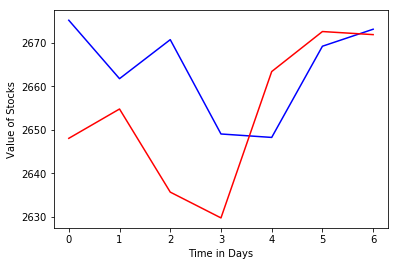

In [22]:
testY4 = np.array(testY4).reshape(-1, 1)

plt.plot(testPredict4, 'b', label = 'Predicted Price')
plt.plot(testY4, 'r', label = 'Actual Price')
plt.xlabel('Time in Days')
plt.ylabel('Value of Stocks')
plt.show()

In [25]:
print(testPredict4[-1:,:])
print(testY4[-1:,:])

[[2673.165]]
[[2671.92]]


In [ ]:
print(testPredict2[-5:,:])
print(testY2[-1:,:])

# Model 3

In [4]:
data3 = importData("data10.csv")
sequence = 7

sc = MinMaxScaler(feature_range=(0, 1))

X_train3, y_train3, X_test3, y_test3 = preprocessData(sc, data3, sequence)

In [5]:
model3= Sequential()
model3.add(LSTM(32,input_shape=(sequence,1)))
model3.add(Dense(1))
model3.add(Activation('linear'))
model3.compile(optimizer = "adam", loss = 'mean_squared_error')

checkpoint3 = ModelCheckpoint("Test32-B512-LB7-D10.hdf5", monitor='loss', verbose=1, save_best_only=True)

history3 = model3.fit(X_train3, y_train3, epochs=2000, batch_size=512,verbose=1, callbacks=[checkpoint3])

Epoch 1/2000
2014/2014 [==============================] - 3s 2ms/step - loss: 0.1054

Epoch 00001: loss improved from inf to 0.10540, saving model to Test32-B512-LB7-D10.hdf5
Epoch 2/2000
2014/2014 [==============================] - 0s 31us/step - loss: 0.0705

Epoch 00002: loss improved from 0.10540 to 0.07047, saving model to Test32-B512-LB7-D10.hdf5
Epoch 3/2000
2014/2014 [==============================] - 0s 36us/step - loss: 0.0407

Epoch 00003: loss improved from 0.07047 to 0.04070, saving model to Test32-B512-LB7-D10.hdf5
Epoch 4/2000
2014/2014 [==============================] - 0s 33us/step - loss: 0.0191

Epoch 00004: loss improved from 0.04070 to 0.01911, saving model to Test32-B512-LB7-D10.hdf5
Epoch 5/2000
2014/2014 [==============================] - 0s 40us/step - loss: 0.0069

Epoch 00005: loss improved from 0.01911 to 0.00688, saving model to Test32-B512-LB7-D10.hdf5
Epoch 6/2000
2014/2014 [==============================] - 0s 41us/step - loss: 0.0036

Epoch 00006: loss 

2014/2014 [==============================] - 0s 29us/step - loss: 1.6334e-04

Epoch 00047: loss improved from 0.00016 to 0.00016, saving model to Test32-B512-LB7-D10.hdf5
Epoch 48/2000
2014/2014 [==============================] - 0s 32us/step - loss: 1.6317e-04

Epoch 00048: loss improved from 0.00016 to 0.00016, saving model to Test32-B512-LB7-D10.hdf5
Epoch 49/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.6278e-04

Epoch 00049: loss improved from 0.00016 to 0.00016, saving model to Test32-B512-LB7-D10.hdf5
Epoch 50/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.6250e-04

Epoch 00050: loss improved from 0.00016 to 0.00016, saving model to Test32-B512-LB7-D10.hdf5
Epoch 51/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.6222e-04

Epoch 00051: loss improved from 0.00016 to 0.00016, saving model to Test32-B512-LB7-D10.hdf5
Epoch 52/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.6208e-0

2014/2014 [==============================] - 0s 34us/step - loss: 1.5110e-04

Epoch 00091: loss improved from 0.00015 to 0.00015, saving model to Test32-B512-LB7-D10.hdf5
Epoch 92/2000
2014/2014 [==============================] - 0s 40us/step - loss: 1.5080e-04

Epoch 00092: loss improved from 0.00015 to 0.00015, saving model to Test32-B512-LB7-D10.hdf5
Epoch 93/2000
2014/2014 [==============================] - 0s 33us/step - loss: 1.5061e-04

Epoch 00093: loss improved from 0.00015 to 0.00015, saving model to Test32-B512-LB7-D10.hdf5
Epoch 94/2000
2014/2014 [==============================] - 0s 38us/step - loss: 1.5029e-04

Epoch 00094: loss improved from 0.00015 to 0.00015, saving model to Test32-B512-LB7-D10.hdf5
Epoch 95/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.5006e-04

Epoch 00095: loss improved from 0.00015 to 0.00015, saving model to Test32-B512-LB7-D10.hdf5
Epoch 96/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.4988e-0

2014/2014 [==============================] - 0s 29us/step - loss: 1.4040e-04

Epoch 00135: loss improved from 0.00014 to 0.00014, saving model to Test32-B512-LB7-D10.hdf5
Epoch 136/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.4023e-04

Epoch 00136: loss improved from 0.00014 to 0.00014, saving model to Test32-B512-LB7-D10.hdf5
Epoch 137/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.4001e-04

Epoch 00137: loss improved from 0.00014 to 0.00014, saving model to Test32-B512-LB7-D10.hdf5
Epoch 138/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.3981e-04

Epoch 00138: loss improved from 0.00014 to 0.00014, saving model to Test32-B512-LB7-D10.hdf5
Epoch 139/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.3963e-04

Epoch 00139: loss improved from 0.00014 to 0.00014, saving model to Test32-B512-LB7-D10.hdf5
Epoch 140/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.39

2014/2014 [==============================] - 0s 30us/step - loss: 1.3278e-04

Epoch 00179: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 180/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.3276e-04

Epoch 00180: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 181/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.3249e-04

Epoch 00181: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 182/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.3237e-04

Epoch 00182: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 183/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.3225e-04

Epoch 00183: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 184/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.32

2014/2014 [==============================] - 0s 29us/step - loss: 1.2818e-04

Epoch 00224: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 225/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2804e-04

Epoch 00225: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 226/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2803e-04

Epoch 00226: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 227/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2793e-04

Epoch 00227: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 228/2000
2014/2014 [==============================] - 0s 34us/step - loss: 1.2789e-04

Epoch 00228: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 229/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.27

Epoch 273/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2567e-04

Epoch 00273: loss did not improve
Epoch 274/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.2539e-04

Epoch 00274: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 275/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2541e-04

Epoch 00275: loss did not improve
Epoch 276/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2539e-04

Epoch 00276: loss did not improve
Epoch 277/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2530e-04

Epoch 00277: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 278/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.2528e-04

Epoch 00278: loss improved from 0.00013 to 0.00013, saving model to Test32-B512-LB7-D10.hdf5
Epoch 279/2000
2014/2014 [==============================] - 0


Epoch 00321: loss did not improve
Epoch 322/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2390e-04

Epoch 00322: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 323/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.2383e-04

Epoch 00323: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 324/2000
2014/2014 [==============================] - 0s 33us/step - loss: 1.2384e-04

Epoch 00324: loss did not improve
Epoch 325/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.2372e-04

Epoch 00325: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 326/2000
2014/2014 [==============================] - 0s 25us/step - loss: 1.2374e-04

Epoch 00326: loss did not improve
Epoch 327/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2366e-04

Epoch 00327: loss improved from 0.00012 to 0.00012, saving m

2014/2014 [==============================] - 0s 30us/step - loss: 1.2224e-04

Epoch 00375: loss did not improve
Epoch 376/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2240e-04

Epoch 00376: loss did not improve
Epoch 377/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2223e-04

Epoch 00377: loss did not improve
Epoch 378/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2246e-04

Epoch 00378: loss did not improve
Epoch 379/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2201e-04

Epoch 00379: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 380/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.2214e-04

Epoch 00380: loss did not improve
Epoch 381/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.2219e-04

Epoch 00381: loss did not improve
Epoch 382/2000
2014/2014 [==============================] - 0s 29us

2014/2014 [==============================] - 0s 31us/step - loss: 1.2052e-04

Epoch 00428: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 429/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.2066e-04

Epoch 00429: loss did not improve
Epoch 430/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2080e-04

Epoch 00430: loss did not improve
Epoch 431/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.2048e-04

Epoch 00431: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 432/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.2038e-04

Epoch 00432: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 433/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.2050e-04

Epoch 00433: loss did not improve
Epoch 434/2000
2014/2014 [==============================] - 0s 35us/step - l

2014/2014 [==============================] - 0s 27us/step - loss: 1.1852e-04

Epoch 00483: loss did not improve
Epoch 484/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.1839e-04

Epoch 00484: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 485/2000
2014/2014 [==============================] - 0s 33us/step - loss: 1.1835e-04

Epoch 00485: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 486/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.1837e-04

Epoch 00486: loss did not improve
Epoch 487/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.1827e-04

Epoch 00487: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 488/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.1838e-04

Epoch 00488: loss did not improve
Epoch 489/2000
2014/2014 [==============================] - 0s 29us/step - l

2014/2014 [==============================] - 0s 27us/step - loss: 1.1633e-04

Epoch 00534: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 535/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.1641e-04

Epoch 00535: loss did not improve
Epoch 536/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.1634e-04

Epoch 00536: loss did not improve
Epoch 537/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.1631e-04

Epoch 00537: loss improved from 0.00012 to 0.00012, saving model to Test32-B512-LB7-D10.hdf5
Epoch 538/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.1649e-04

Epoch 00538: loss did not improve
Epoch 539/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.1655e-04

Epoch 00539: loss did not improve
Epoch 540/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.1662e-04

Epoch 00540: loss did not improve
Epoch 54

2014/2014 [==============================] - 0s 31us/step - loss: 1.1423e-04

Epoch 00588: loss did not improve
Epoch 589/2000
2014/2014 [==============================] - 0s 30us/step - loss: 1.1422e-04

Epoch 00589: loss did not improve
Epoch 590/2000
2014/2014 [==============================] - 0s 32us/step - loss: 1.1373e-04

Epoch 00590: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 591/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.1417e-04

Epoch 00591: loss did not improve
Epoch 592/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.1418e-04

Epoch 00592: loss did not improve
Epoch 593/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.1345e-04

Epoch 00593: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 594/2000
2014/2014 [==============================] - 0s 27us/step - loss: 1.1379e-04

Epoch 00594: loss did not improve
Epoch 59

2014/2014 [==============================] - 0s 30us/step - loss: 1.1116e-04

Epoch 00643: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 644/2000
2014/2014 [==============================] - 0s 32us/step - loss: 1.1094e-04

Epoch 00644: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 645/2000
2014/2014 [==============================] - 0s 34us/step - loss: 1.1083e-04

Epoch 00645: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 646/2000
2014/2014 [==============================] - 0s 36us/step - loss: 1.1076e-04

Epoch 00646: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 647/2000
2014/2014 [==============================] - 0s 40us/step - loss: 1.1075e-04

Epoch 00647: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 648/2000
2014/2014 [==============================] - 0s 37us/step - loss: 1.10

2014/2014 [==============================] - 0s 30us/step - loss: 1.0775e-04

Epoch 00697: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 698/2000
2014/2014 [==============================] - 0s 26us/step - loss: 1.0759e-04

Epoch 00698: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 699/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.0793e-04

Epoch 00699: loss did not improve
Epoch 700/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.0783e-04

Epoch 00700: loss did not improve
Epoch 701/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.0783e-04

Epoch 00701: loss did not improve
Epoch 702/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.0758e-04

Epoch 00702: loss improved from 0.00011 to 0.00011, saving model to Test32-B512-LB7-D10.hdf5
Epoch 703/2000
2014/2014 [==============================] - 0s 30us/step - l

2014/2014 [==============================] - 0s 31us/step - loss: 1.0525e-04

Epoch 00751: loss did not improve
Epoch 752/2000
2014/2014 [==============================] - 0s 29us/step - loss: 1.0415e-04

Epoch 00752: loss improved from 0.00010 to 0.00010, saving model to Test32-B512-LB7-D10.hdf5
Epoch 753/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.0391e-04

Epoch 00753: loss improved from 0.00010 to 0.00010, saving model to Test32-B512-LB7-D10.hdf5
Epoch 754/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.0364e-04

Epoch 00754: loss improved from 0.00010 to 0.00010, saving model to Test32-B512-LB7-D10.hdf5
Epoch 755/2000
2014/2014 [==============================] - 0s 32us/step - loss: 1.0371e-04

Epoch 00755: loss did not improve
Epoch 756/2000
2014/2014 [==============================] - 0s 31us/step - loss: 1.0411e-04

Epoch 00756: loss did not improve
Epoch 757/2000
2014/2014 [==============================] - 0s 31us/step - l

Epoch 803/2000
2014/2014 [==============================] - 0s 28us/step - loss: 1.0024e-04

Epoch 00803: loss did not improve
Epoch 804/2000
2014/2014 [==============================] - 0s 29us/step - loss: 9.9034e-05

Epoch 00804: loss improved from 0.00010 to 0.00010, saving model to Test32-B512-LB7-D10.hdf5
Epoch 805/2000
2014/2014 [==============================] - 0s 30us/step - loss: 9.9067e-05

Epoch 00805: loss did not improve
Epoch 806/2000
2014/2014 [==============================] - 0s 27us/step - loss: 9.9890e-05

Epoch 00806: loss did not improve
Epoch 807/2000
2014/2014 [==============================] - 0s 29us/step - loss: 9.9192e-05

Epoch 00807: loss did not improve
Epoch 808/2000
2014/2014 [==============================] - 0s 31us/step - loss: 9.8902e-05

Epoch 00808: loss improved from 0.00010 to 0.00010, saving model to Test32-B512-LB7-D10.hdf5
Epoch 809/2000
2014/2014 [==============================] - 0s 44us/step - loss: 9.8983e-05

Epoch 00809: loss did not i

2014/2014 [==============================] - 0s 29us/step - loss: 9.3499e-05

Epoch 00855: loss improved from 0.00009 to 0.00009, saving model to Test32-B512-LB7-D10.hdf5
Epoch 856/2000
2014/2014 [==============================] - 0s 30us/step - loss: 9.3906e-05

Epoch 00856: loss did not improve
Epoch 857/2000
2014/2014 [==============================] - 0s 29us/step - loss: 9.3973e-05

Epoch 00857: loss did not improve
Epoch 858/2000
2014/2014 [==============================] - 0s 31us/step - loss: 9.4694e-05

Epoch 00858: loss did not improve
Epoch 859/2000
2014/2014 [==============================] - 0s 36us/step - loss: 9.4999e-05

Epoch 00859: loss did not improve
Epoch 860/2000
2014/2014 [==============================] - 0s 26us/step - loss: 9.3088e-05

Epoch 00860: loss improved from 0.00009 to 0.00009, saving model to Test32-B512-LB7-D10.hdf5
Epoch 861/2000
2014/2014 [==============================] - 0s 27us/step - loss: 9.4083e-05

Epoch 00861: loss did not improve
Epoch 86

2014/2014 [==============================] - 0s 34us/step - loss: 8.6419e-05

Epoch 00908: loss improved from 0.00009 to 0.00009, saving model to Test32-B512-LB7-D10.hdf5
Epoch 909/2000
2014/2014 [==============================] - 0s 28us/step - loss: 8.6793e-05

Epoch 00909: loss did not improve
Epoch 910/2000
2014/2014 [==============================] - 0s 29us/step - loss: 8.6562e-05

Epoch 00910: loss did not improve
Epoch 911/2000
2014/2014 [==============================] - 0s 28us/step - loss: 8.6126e-05

Epoch 00911: loss improved from 0.00009 to 0.00009, saving model to Test32-B512-LB7-D10.hdf5
Epoch 912/2000
2014/2014 [==============================] - 0s 28us/step - loss: 8.6676e-05

Epoch 00912: loss did not improve
Epoch 913/2000
2014/2014 [==============================] - 0s 29us/step - loss: 8.6167e-05

Epoch 00913: loss did not improve
Epoch 914/2000
2014/2014 [==============================] - 0s 31us/step - loss: 8.5972e-05

Epoch 00914: loss improved from 0.00009 to

2014/2014 [==============================] - 0s 28us/step - loss: 8.2153e-05

Epoch 00964: loss did not improve
Epoch 965/2000
2014/2014 [==============================] - 0s 27us/step - loss: 8.1659e-05

Epoch 00965: loss did not improve
Epoch 966/2000
2014/2014 [==============================] - 0s 32us/step - loss: 8.1814e-05

Epoch 00966: loss did not improve
Epoch 967/2000
2014/2014 [==============================] - 0s 27us/step - loss: 8.2799e-05

Epoch 00967: loss did not improve
Epoch 968/2000
2014/2014 [==============================] - 0s 30us/step - loss: 8.1688e-05

Epoch 00968: loss did not improve
Epoch 969/2000
2014/2014 [==============================] - 0s 27us/step - loss: 7.9326e-05

Epoch 00969: loss improved from 0.00008 to 0.00008, saving model to Test32-B512-LB7-D10.hdf5
Epoch 970/2000
2014/2014 [==============================] - 0s 30us/step - loss: 7.9537e-05

Epoch 00970: loss did not improve
Epoch 971/2000
2014/2014 [==============================] - 0s 29us

2014/2014 [==============================] - 0s 27us/step - loss: 8.0738e-05

Epoch 01023: loss did not improve
Epoch 1024/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.8640e-05

Epoch 01024: loss did not improve
Epoch 1025/2000
2014/2014 [==============================] - 0s 27us/step - loss: 7.9663e-05

Epoch 01025: loss did not improve
Epoch 1026/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.7475e-05

Epoch 01026: loss did not improve
Epoch 1027/2000
2014/2014 [==============================] - 0s 26us/step - loss: 7.5707e-05

Epoch 01027: loss improved from 0.00008 to 0.00008, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1028/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.5481e-05

Epoch 01028: loss improved from 0.00008 to 0.00008, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1029/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.7699e-05

Epoch 01029: loss did not improve
Ep

2014/2014 [==============================] - 0s 28us/step - loss: 7.3960e-05

Epoch 01080: loss did not improve
Epoch 1081/2000
2014/2014 [==============================] - 0s 33us/step - loss: 7.5243e-05

Epoch 01081: loss did not improve
Epoch 1082/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.3483e-05

Epoch 01082: loss did not improve
Epoch 1083/2000
2014/2014 [==============================] - 0s 27us/step - loss: 7.6580e-05

Epoch 01083: loss did not improve
Epoch 1084/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.5463e-05

Epoch 01084: loss did not improve
Epoch 1085/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.2874e-05

Epoch 01085: loss improved from 0.00007 to 0.00007, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1086/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.3708e-05

Epoch 01086: loss did not improve
Epoch 1087/2000
2014/2014 [==============================] - 

2014/2014 [==============================] - 0s 28us/step - loss: 7.1124e-05

Epoch 01137: loss did not improve
Epoch 1138/2000
2014/2014 [==============================] - 0s 33us/step - loss: 7.0837e-05

Epoch 01138: loss did not improve
Epoch 1139/2000
2014/2014 [==============================] - 0s 30us/step - loss: 7.0728e-05

Epoch 01139: loss did not improve
Epoch 1140/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.0506e-05

Epoch 01140: loss improved from 0.00007 to 0.00007, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1141/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.0465e-05

Epoch 01141: loss improved from 0.00007 to 0.00007, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1142/2000
2014/2014 [==============================] - 0s 27us/step - loss: 7.1102e-05

Epoch 01142: loss did not improve
Epoch 1143/2000
2014/2014 [==============================] - 0s 28us/step - loss: 7.1151e-05

Epoch 01143: loss did not improve
Ep

2014/2014 [==============================] - 0s 28us/step - loss: 6.9219e-05

Epoch 01195: loss did not improve
Epoch 1196/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.9992e-05

Epoch 01196: loss did not improve
Epoch 1197/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.8902e-05

Epoch 01197: loss did not improve
Epoch 1198/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.8851e-05

Epoch 01198: loss did not improve
Epoch 1199/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.9661e-05

Epoch 01199: loss did not improve
Epoch 1200/2000
2014/2014 [==============================] - 0s 26us/step - loss: 6.9667e-05

Epoch 01200: loss did not improve
Epoch 1201/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.0440e-05

Epoch 01201: loss did not improve
Epoch 1202/2000
2014/2014 [==============================] - 0s 29us/step - loss: 7.1274e-05

Epoch 01202: loss did not 


Epoch 01255: loss did not improve
Epoch 1256/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.8481e-05

Epoch 01256: loss did not improve
Epoch 1257/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.7912e-05

Epoch 01257: loss did not improve
Epoch 1258/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.7192e-05

Epoch 01258: loss improved from 0.00007 to 0.00007, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1259/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.7613e-05

Epoch 01259: loss did not improve
Epoch 1260/2000
2014/2014 [==============================] - 0s 35us/step - loss: 6.8839e-05

Epoch 01260: loss did not improve
Epoch 1261/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.9133e-05

Epoch 01261: loss did not improve
Epoch 1262/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.8350e-05

Epoch 01262: loss did not improve
Epoch 1263

2014/2014 [==============================] - 0s 30us/step - loss: 6.6340e-05

Epoch 01315: loss did not improve
Epoch 1316/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.6234e-05

Epoch 01316: loss did not improve
Epoch 1317/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.5629e-05

Epoch 01317: loss did not improve
Epoch 1318/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.6140e-05

Epoch 01318: loss did not improve
Epoch 1319/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.6114e-05

Epoch 01319: loss did not improve
Epoch 1320/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.5552e-05

Epoch 01320: loss did not improve
Epoch 1321/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.6350e-05

Epoch 01321: loss did not improve
Epoch 1322/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.8430e-05

Epoch 01322: loss did not 

2014/2014 [==============================] - 0s 28us/step - loss: 6.4134e-05

Epoch 01374: loss did not improve
Epoch 1375/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.4039e-05

Epoch 01375: loss did not improve
Epoch 1376/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.4271e-05

Epoch 01376: loss did not improve
Epoch 1377/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.4637e-05

Epoch 01377: loss did not improve
Epoch 1378/2000
2014/2014 [==============================] - 0s 33us/step - loss: 6.7110e-05

Epoch 01378: loss did not improve
Epoch 1379/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.4934e-05

Epoch 01379: loss did not improve
Epoch 1380/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.4270e-05

Epoch 01380: loss did not improve
Epoch 1381/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.5429e-05

Epoch 01381: loss did not 

2014/2014 [==============================] - 0s 27us/step - loss: 6.4161e-05

Epoch 01435: loss did not improve
Epoch 1436/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.4473e-05

Epoch 01436: loss did not improve
Epoch 1437/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.5210e-05

Epoch 01437: loss did not improve
Epoch 1438/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.3440e-05

Epoch 01438: loss did not improve
Epoch 1439/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.3974e-05

Epoch 01439: loss did not improve
Epoch 1440/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.2663e-05

Epoch 01440: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1441/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.3154e-05

Epoch 01441: loss did not improve
Epoch 1442/2000
2014/2014 [==============================] - 

2014/2014 [==============================] - 0s 28us/step - loss: 6.1708e-05

Epoch 01496: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1497/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.1754e-05

Epoch 01497: loss did not improve
Epoch 1498/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.1538e-05

Epoch 01498: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1499/2000
2014/2014 [==============================] - 0s 31us/step - loss: 6.1571e-05

Epoch 01499: loss did not improve
Epoch 1500/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.1690e-05

Epoch 01500: loss did not improve
Epoch 1501/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.2025e-05

Epoch 01501: loss did not improve
Epoch 1502/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.2862e-05

Epoch 01502: loss did not improve
Ep

2014/2014 [==============================] - 0s 29us/step - loss: 6.1242e-05

Epoch 01555: loss did not improve
Epoch 1556/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.0665e-05

Epoch 01556: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1557/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.0939e-05

Epoch 01557: loss did not improve
Epoch 1558/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.0768e-05

Epoch 01558: loss did not improve
Epoch 1559/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.1343e-05

Epoch 01559: loss did not improve
Epoch 1560/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.0762e-05

Epoch 01560: loss did not improve
Epoch 1561/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.1155e-05

Epoch 01561: loss did not improve
Epoch 1562/2000
2014/2014 [==============================] - 

2014/2014 [==============================] - 0s 28us/step - loss: 6.0238e-05

Epoch 01616: loss did not improve
Epoch 1617/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.0933e-05

Epoch 01617: loss did not improve
Epoch 1618/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.3887e-05

Epoch 01618: loss did not improve
Epoch 1619/2000
2014/2014 [==============================] - 0s 32us/step - loss: 6.4391e-05

Epoch 01619: loss did not improve
Epoch 1620/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.2176e-05

Epoch 01620: loss did not improve
Epoch 1621/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.2338e-05

Epoch 01621: loss did not improve
Epoch 1622/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.1708e-05

Epoch 01622: loss did not improve
Epoch 1623/2000
2014/2014 [==============================] - 0s 27us/step - loss: 6.0327e-05

Epoch 01623: loss did not 

2014/2014 [==============================] - 0s 28us/step - loss: 6.0077e-05

Epoch 01677: loss did not improve
Epoch 1678/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.9427e-05

Epoch 01678: loss did not improve
Epoch 1679/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.9319e-05

Epoch 01679: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1680/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.9267e-05

Epoch 01680: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1681/2000
2014/2014 [==============================] - 0s 29us/step - loss: 5.9481e-05

Epoch 01681: loss did not improve
Epoch 1682/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.0621e-05

Epoch 01682: loss did not improve
Epoch 1683/2000
2014/2014 [==============================] - 0s 30us/step - loss: 6.1960e-05

Epoch 01683: loss did not improve
Ep

2014/2014 [==============================] - 0s 31us/step - loss: 5.9404e-05

Epoch 01739: loss did not improve
Epoch 1740/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.8925e-05

Epoch 01740: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1741/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.9321e-05

Epoch 01741: loss did not improve
Epoch 1742/2000
2014/2014 [==============================] - 0s 31us/step - loss: 5.8746e-05

Epoch 01742: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1743/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.0990e-05

Epoch 01743: loss did not improve
Epoch 1744/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.9566e-05

Epoch 01744: loss did not improve
Epoch 1745/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.0624e-05

Epoch 01745: loss did not improve
Ep

2014/2014 [==============================] - 0s 29us/step - loss: 6.0928e-05

Epoch 01800: loss did not improve
Epoch 1801/2000
2014/2014 [==============================] - 0s 29us/step - loss: 6.0284e-05

Epoch 01801: loss did not improve
Epoch 1802/2000
2014/2014 [==============================] - 0s 29us/step - loss: 5.9329e-05

Epoch 01802: loss did not improve
Epoch 1803/2000
2014/2014 [==============================] - 0s 26us/step - loss: 6.1284e-05

Epoch 01803: loss did not improve
Epoch 1804/2000
2014/2014 [==============================] - 0s 28us/step - loss: 6.0959e-05

Epoch 01804: loss did not improve
Epoch 1805/2000
2014/2014 [==============================] - 0s 27us/step - loss: 5.9452e-05

Epoch 01805: loss did not improve
Epoch 1806/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8758e-05

Epoch 01806: loss did not improve
Epoch 1807/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.9028e-05

Epoch 01807: loss did not 

2014/2014 [==============================] - 0s 31us/step - loss: 5.8921e-05

Epoch 01863: loss did not improve
Epoch 1864/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8756e-05

Epoch 01864: loss did not improve
Epoch 1865/2000
2014/2014 [==============================] - 0s 27us/step - loss: 5.9932e-05

Epoch 01865: loss did not improve
Epoch 1866/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.9183e-05

Epoch 01866: loss did not improve
Epoch 1867/2000
2014/2014 [==============================] - 0s 32us/step - loss: 5.9645e-05

Epoch 01867: loss did not improve
Epoch 1868/2000
2014/2014 [==============================] - 0s 33us/step - loss: 5.9061e-05

Epoch 01868: loss did not improve
Epoch 1869/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8983e-05

Epoch 01869: loss did not improve
Epoch 1870/2000
2014/2014 [==============================] - 0s 32us/step - loss: 5.9540e-05

Epoch 01870: loss did not 

2014/2014 [==============================] - 0s 29us/step - loss: 5.9928e-05

Epoch 01926: loss did not improve
Epoch 1927/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.8816e-05

Epoch 01927: loss did not improve
Epoch 1928/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8822e-05

Epoch 01928: loss did not improve
Epoch 1929/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.9326e-05

Epoch 01929: loss did not improve
Epoch 1930/2000
2014/2014 [==============================] - 0s 26us/step - loss: 5.8619e-05

Epoch 01930: loss did not improve
Epoch 1931/2000
2014/2014 [==============================] - 0s 29us/step - loss: 5.8633e-05

Epoch 01931: loss did not improve
Epoch 1932/2000
2014/2014 [==============================] - 0s 29us/step - loss: 5.8242e-05

Epoch 01932: loss improved from 0.00006 to 0.00006, saving model to Test32-B512-LB7-D10.hdf5
Epoch 1933/2000
2014/2014 [==============================] - 

2014/2014 [==============================] - 0s 31us/step - loss: 5.9060e-05

Epoch 01988: loss did not improve
Epoch 1989/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8263e-05

Epoch 01989: loss did not improve
Epoch 1990/2000
2014/2014 [==============================] - 0s 28us/step - loss: 5.8087e-05

Epoch 01990: loss did not improve
Epoch 1991/2000
2014/2014 [==============================] - 0s 27us/step - loss: 5.8362e-05

Epoch 01991: loss did not improve
Epoch 1992/2000
2014/2014 [==============================] - 0s 31us/step - loss: 5.9503e-05

Epoch 01992: loss did not improve
Epoch 1993/2000
2014/2014 [==============================] - 0s 29us/step - loss: 5.9111e-05

Epoch 01993: loss did not improve
Epoch 1994/2000
2014/2014 [==============================] - 0s 30us/step - loss: 5.8062e-05

Epoch 01994: loss did not improve
Epoch 1995/2000
2014/2014 [==============================] - 0s 27us/step - loss: 5.8721e-05

Epoch 01995: loss did not 

In [53]:
trainPredict3 = model3.predict(X_train3)
testPredict3 = model3.predict(X_test3)

trainPredict3 = sc.inverse_transform(trainPredict3)
trainY3 = sc.inverse_transform([y_train3])
testPredict3 = sc.inverse_transform(testPredict3)
testY3 = sc.inverse_transform([y_test3])

trainError3 = math.sqrt(mean_squared_error(trainY3[0], trainPredict3[:,0]))
testError3 = math.sqrt(mean_squared_error(testY3[0], testPredict3[:,0]))

print('Train Error: %.2f RMSE' % (trainError3))
print('Test Error: %.2f RMSE' % (testError3))
print("----------------------------------------")
print('Train Accuracy: %.2f RMSE' % (100-trainError3))
print('Test Accuracy: %.2f RMSE' % (100-testError3))

Train Error: 17.39 RMSE
Test Error: 20.74 RMSE
----------------------------------------
Train Accuracy: 82.61 RMSE
Test Accuracy: 79.26 RMSE


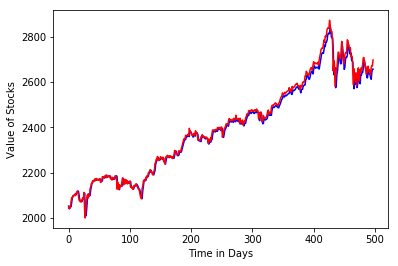

In [55]:
testY3 = np.array(testY3).reshape(-1, 1)

plt.plot(testPredict3, 'b', label = 'Predicted Price')
plt.plot(testY3, 'r', label = 'Actual Price')
plt.xlabel('Time in Days')
plt.ylabel('Value of Stocks')
plt.show()

<function matplotlib.pyplot.show>

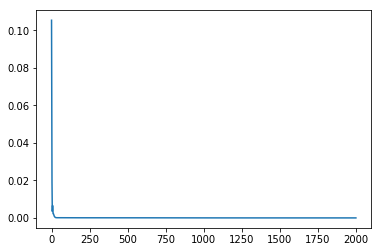

In [6]:
import matplotlib.pyplot as plt

plt.plot(history3.history["loss"])
plt.show